# Challenge 1 - Energy Production Data Simulation

In [1]:
# -*- coding:utf-8 -*-
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [2]:
train_data = pd.read_csv('data/training_dataset_500.csv')
test_data = pd.read_csv('data/test_dataset_500.csv')

In [3]:
train_data.tail()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
11495,11994,18,500,2013,1,2.0,234.6,640
11496,11995,19,500,2013,2,4.2,201.8,638
11497,11996,20,500,2013,3,11.2,234.0,778
11498,11997,21,500,2013,4,13.6,237.1,758
11499,11998,22,500,2013,5,19.2,258.4,838


In [4]:
train_data.dtypes

ID                    int64
Label                 int64
House                 int64
Year                  int64
Month                 int64
Temperature         float64
Daylight            float64
EnergyProduction      int64
dtype: object

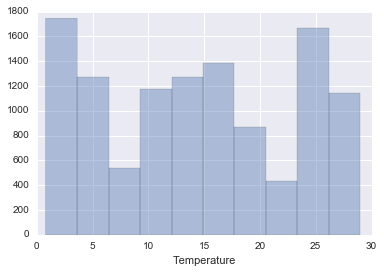

In [5]:
sns.distplot(train_data["Temperature"], kde=False, rug=False, bins=10)

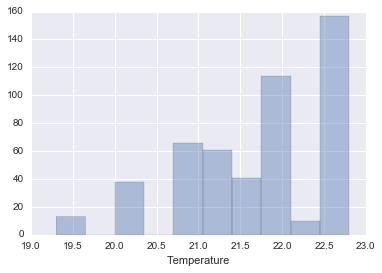

In [6]:
sns.distplot(test_data["Temperature"], kde=False, rug=False, bins=10)

From above, I thought it might be better to use data around June for training if I apply linear regression in order to focus on the data behavior near the target.

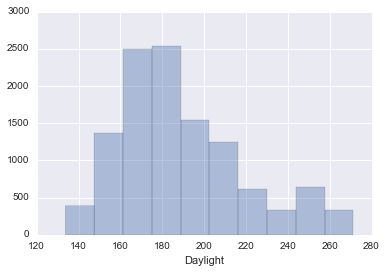

In [7]:
sns.distplot(train_data["Daylight"], kde=False, rug=False, bins=10)

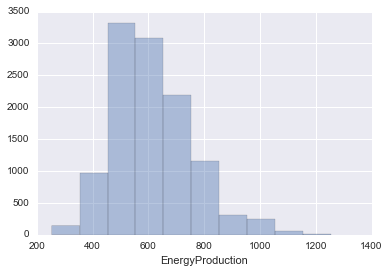

In [8]:
sns.distplot(train_data["EnergyProduction"], kde=False, rug=False, bins=10)

In [9]:
train_data.corr()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
ID,1.000000,0.001915,9.999982e-01,0.001746,-4.985270e-04,0.000388,0.002556,-0.007900
Label,0.001915,1.000000,0.000000e+00,0.911685,-2.603472e-01,-0.257487,0.508205,0.210305
House,0.999998,0.000000,1.000000e+00,0.000000,-1.816873e-18,0.000881,0.001583,-0.008303
Year,0.001746,0.911685,0.000000e+00,1.000000,-6.340757e-01,-0.356800,0.524603,0.267481
Month,-0.000499,-0.260347,-1.816873e-18,-0.634076,1.000000e+00,0.353837,-0.276307,-0.232748
Temperature,0.000388,-0.257487,8.810764e-04,-0.356800,3.538369e-01,1.000000,-0.053363,0.272789
Daylight,0.002556,0.508205,1.582656e-03,0.524603,-2.763068e-01,-0.053363,1.000000,0.531577
EnergyProduction,-0.007900,0.210305,-8.302696e-03,0.267481,-2.327484e-01,0.272789,0.531577,1.000000


In [10]:
train_data[['EnergyProduction','Daylight','Temperature']].corr()

,EnergyProduction,Daylight,Temperature
EnergyProduction,1.000000,0.531577,0.272789
Daylight,0.531577,1.000000,-0.053363
Temperature,0.272789,-0.053363,1.000000


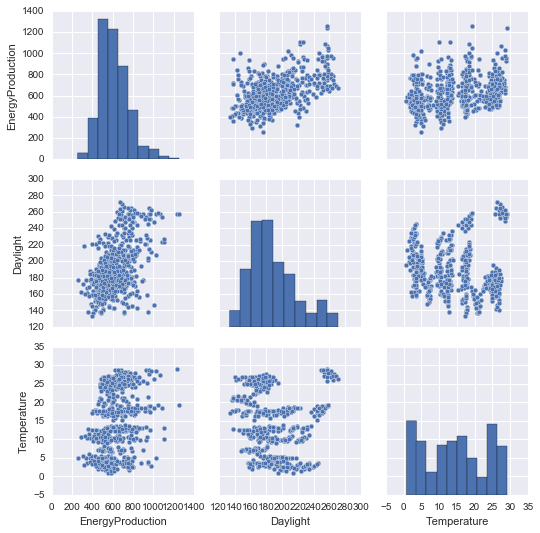

In [11]:
sns.pairplot(train_data[['EnergyProduction','Daylight','Temperature']])

# Prediction
From data handling above, I focused on the following 3 points
* I use "Temperature" and "Daylight" as Explanatory variable and "EnergyProduction" as Objective variable
* I use the data around June because it's inferred that those variables above would be similar when they are from 'similar time' of the year
* I apply linear-regression because the data is not so big

In [40]:
focus_train_data = train_data[train_data["Month"].isin([4,5, 6, 7,8])]
train_X = focus_train_data[["Temperature", "Daylight"]]
train_y = focus_train_data["EnergyProduction"]
test_X = test_data[["Temperature", "Daylight"]]
test_y = test_data["EnergyProduction"]

In [41]:
regr = linear_model.LinearRegression(fit_intercept=True,
                                     normalize=False,
                                     copy_X=True, 
                                     n_jobs=1)
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y,
                                                      test_size=0.2,
                                                      random_state=42)
regr.fit(train_X, train_y)
pred_y = regr.predict(valid_X)
valid_mape = np.mean(np.abs((valid_y - pred_y) / valid_y)) * 100
print(valid_mape)

12.5876634902


In [42]:
pred_y = regr.predict(test_X)
mape = np.mean(np.abs((test_y - pred_y) / test_y)) * 100
print("mape: ", mape)

mape:  13.4488632882


## Addition
I also applied ElasticNet because the features I used was few and tried to prevent over-fitting  
However, it turned out not to be a big help

In [68]:
from sklearn.linear_model import ElasticNet

alpha = 0.1
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

pred_y = enet.fit(train_X, train_y).predict(test_X)
mape = np.mean(np.abs((test_y - pred_y) / test_y)) * 100
print("mape: ", mape)

mape:  13.4488006966


In [69]:
dict = {"EnergyConsumption": pred_y, "House": [i for i in range(1,501)]}
df = pd.DataFrame(dict, columns=['House', 'EnergyConsumption'])
df.to_csv('predicted_energy_production.csv')
print(df)

     House  EnergyConsumption
0        1         537.996299
1        2         533.149916
2        3         540.767855
3        4         537.811104
4        5         537.811104
5        6         530.403285
6        7         541.388651
7        8         535.535721
8        9         538.307277
9       10         538.928073
10      11         538.928073
11      12         530.403285
12      13         533.795637
13      14         538.928073
14      15         537.996299
15      16         533.149916
16      17         532.328564
17      18         536.392720
18      19         533.149916
19      20         539.985629
20      21         542.446207
21      22         535.535721
22      23         538.456824
23      24         530.403285
24      25         538.456824
25      26         542.942380
26      27         541.388651
27      28         538.853299
28      29         533.149916
29      30         534.863916
..     ...                ...
470    471         538.853299
471    472